## Imports

In [1]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
#Keras imports
import tensorflow as tf
import tensorflow.keras.preprocessing as preprocessing
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers

Using TensorFlow backend.


## Pathways

In [2]:
not_path = os.listdir("../Data/Images")
not_path.remove(".DS_Store") #if it's still in there, it likes to pop up from time to time
path_to_data = "../Data"

data_path = os.path.join('..', 'Data')

test_path = os.path.join(data_path, 'test_images')
train_path = os.path.join(data_path, 'train_images')
val_path = os.path.join(data_path, 'val_images')


images_path = os.path.join(data_path, 'Images')
image_folders = os.listdir(images_path)
test_folders = os.listdir(test_path)
train_folders = os.listdir(train_path)
val_folders = os.listdir(val_path)

In [3]:
train_dir = "../Data/ExModeling_train"
test_dir = "../Data/ExModeling_test"
val_dir = "../Data/ExModeling_val"

## Set up

Set up some image size and batch size variables for my convenience.

In [4]:
img_size = 150
bch_size = 20

In [5]:
img_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True)

train_generator = img_gen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    color_mode='rgb',
    batch_size=bch_size,
    class_mode='categorical')

validation_generator = img_gen.flow_from_directory(
    val_dir, 
    target_size=(img_size, img_size), 
    color_mode='rgb',
    batch_size=bch_size, 
    class_mode='categorical')

test_generator = img_gen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    color_mode='rgb',
    batch_size=bch_size,
    class_mode='categorical',
    shuffle=False)


Found 664 images belonging to 5 classes.
Found 145 images belonging to 5 classes.
Found 141 images belonging to 5 classes.


## First Simple Model

In [ ]:

fsm_train_dir = "../Data/ExModeling_train"
fsm_train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        fsm_train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')
fsm_train_generator.class_indices

In [ ]:
fsm_model = models.Sequential()
fsm_model.add(layers.Dense(64, input_shape = (150, 150, 3)))
fsm_model.add(layers.Flatten())
fsm_model.add(layers.Dense(3, activation = 'softmax'))
fsm_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
history = fsm_model.fit_generator(train_generator, steps_per_epoch=100, epochs=5)


## Modeling

[refrenced material](https://github.com/learn-co-students/dsc-image-classification-lab-sea01-dtsc-ft-051120/tree/solution) - It even has the same dataset, that's what I get for using the first google result of 'kaggle dog image dataset'

Model 1: 3 dogs, dense and convolutional layers, image size = 128x128

In [91]:
model_1 = models.Sequential()
model_1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))#imput layer
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(64, activation='relu'))
model_1.add(layers.Dense(128, activation='relu'))
model_1.add(layers.Dense(3, activation='softmax'))#output layer w/ softmax

model_1.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [13]:
history_1 = model_1.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

W0810 14:44:43.136464 4631838144 deprecation.py:323] From /Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0810 14:44:43.294936 4631838144 deprecation_wrapper.py:119] From /Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
100/100 [==============================] - 46s 463ms/step - loss: 1.0545 - acc: 0.4389 - val_loss: 1.0658 - val_acc: 0.4286
Epoch 2/10
100/100 [==============================] - 60s 601ms/step - loss: 0.8852 - acc: 0.6138 - val_loss: 0.9146 - val_acc: 0.5714
Epoch 3/10
100/100 [==============================] - 45s 450ms/step - loss: 0.7634 - acc: 0.6784 - val_loss: 0.9709 - val_acc: 0.4286
Epoch 4/10
100/100 [==============================] - 46s 458ms/step - loss: 0.6736 - acc: 0.7257 - val_loss: 1.0234 - val_acc: 0.4286
Epoch 5/10
100/100 [==============================] - 56s 564ms/step - loss: 0.6076 - acc: 0.7526 - val_loss: 0.9976 - val_acc: 0.4286
Epoch 6/10
100/100 [==============================] - 49s 493ms/step - loss: 0.5093 - acc: 0.8094 - val_loss: 1.0799 - val_acc: 0.5714
Epoch 7/10
100/100 [==============================] - 54s 538ms/step - loss: 0.4053 - acc: 0.8505 - val_loss: 1.1888 - val_acc: 0.5714
Epoch 8/10
100/100 [==============================] - 4

Model 2: Added pomeranians and saluki for more classes, added more neurons

In [20]:
model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))#imput layer
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Flatten())
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dense(128, activation='relu'))
model_2.add(layers.Dense(256, activation='relu'))
model_2.add(layers.Dense(5, activation='softmax'))#output layer 

model_2.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [21]:
history_2 = model_2.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 71s 707ms/step - loss: 1.5879 - acc: 0.2458 - val_loss: 1.6248 - val_acc: 0.2500
Epoch 2/10
100/100 [==============================] - 53s 527ms/step - loss: 1.4926 - acc: 0.3547 - val_loss: 1.5292 - val_acc: 0.5833
Epoch 3/10
100/100 [==============================] - 56s 559ms/step - loss: 1.4138 - acc: 0.3906 - val_loss: 1.4466 - val_acc: 0.4167
Epoch 4/10
100/100 [==============================] - 57s 568ms/step - loss: 1.3638 - acc: 0.4211 - val_loss: 1.3588 - val_acc: 0.4167
Epoch 5/10
100/100 [==============================] - 50s 503ms/step - loss: 1.3065 - acc: 0.4616 - val_loss: 1.4726 - val_acc: 0.4167
Epoch 6/10
100/100 [==============================] - 59s 589ms/step - loss: 1.2456 - acc: 0.5034 - val_loss: 1.3056 - val_acc: 0.5833
Epoch 7/10
100/100 [==============================] - 51s 509ms/step - loss: 1.2044 - acc: 0.5152 - val_loss: 1.4435 - val_acc: 0.5000
Epoch 8/10
100/100 [==============================] - 5

Did a second histroy with more epochs because the accuracy score was going up

In [22]:
history_3 = model_2.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=17, 
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/17
100/100 [==============================] - 56s 559ms/step - loss: 0.9191 - acc: 0.6364 - val_loss: 1.5649 - val_acc: 0.4167
Epoch 2/17
100/100 [==============================] - 57s 566ms/step - loss: 0.8247 - acc: 0.6919 - val_loss: 1.5214 - val_acc: 0.5000
Epoch 3/17
100/100 [==============================] - 52s 523ms/step - loss: 0.7221 - acc: 0.7389 - val_loss: 1.4327 - val_acc: 0.3333
Epoch 4/17
100/100 [==============================] - 59s 588ms/step - loss: 0.6411 - acc: 0.7741 - val_loss: 1.9297 - val_acc: 0.4167
Epoch 5/17
100/100 [==============================] - 51s 510ms/step - loss: 0.5018 - acc: 0.8292 - val_loss: 1.6266 - val_acc: 0.4167
Epoch 6/17
100/100 [==============================] - 52s 515ms/step - loss: 0.3874 - acc: 0.8622 - val_loss: 1.7267 - val_acc: 0.4167
Epoch 7/17
100/100 [==============================] - 59s 590ms/step - loss: 0.3269 - acc: 0.8879 - val_loss: 2.0073 - val_acc: 0.2500
Epoch 8/17
100/100 [==============================] - 5

Oops, looks like it ran 27 times, val acc is low, most val_image folders of breeds have 2-3 images, more might be needed

The new plan is to run a 5 breed model with a distribution of train 70% test 15% val 15% rather than the current 90 9 1 

Changes were made, 70 15 15 achieved, lets try the same breeds in hopes of better val acc with model 3

In [6]:
model_3 = models.Sequential()
model_3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))#imput layer
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Flatten())
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(128, activation='relu'))
model_3.add(layers.Dense(256, activation='relu'))
model_3.add(layers.Dense(5, activation='softmax'))

model_3.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

W0819 09:59:21.605143 4683804096 deprecation_wrapper.py:119] From /Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0819 09:59:21.727998 4683804096 deprecation_wrapper.py:119] From /Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0819 09:59:21.772289 4683804096 deprecation_wrapper.py:119] From /Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0819 09:59:21.846021 4683804096 deprecation_wrapper.py:119] From /Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.m

In [7]:
history_4 = model_3.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=17, 
    validation_data=validation_generator,
    validation_steps=50)

W0819 09:59:37.809146 4683804096 deprecation.py:323] From /Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0819 09:59:38.092188 4683804096 deprecation_wrapper.py:119] From /Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/17
100/100 [==============================] - 132s 1s/step - loss: 1.5914 - acc: 0.2655 - val_loss: 1.5863 - val_acc: 0.2912
Epoch 2/17
100/100 [==============================] - 143s 1s/step - loss: 1.4940 - acc: 0.3345 - val_loss: 1.4649 - val_acc: 0.3659
Epoch 3/17
100/100 [==============================] - 144s 1s/step - loss: 1.4312 - acc: 0.3710 - val_loss: 1.4398 - val_acc: 0.3714
Epoch 4/17
100/100 [==============================] - 134s 1s/step - loss: 1.3897 - acc: 0.4049 - val_loss: 1.4823 - val_acc: 0.3520
Epoch 5/17
100/100 [==============================] - 121s 1s/step - loss: 1.3618 - acc: 0.4125 - val_loss: 1.4469 - val_acc: 0.3703
Epoch 6/17
100/100 [==============================] - 113s 1s/step - loss: 1.3636 - acc: 0.4175 - val_loss: 1.4424 - val_acc: 0.3769
Epoch 7/17
100/100 [==============================] - 118s 1s/step - loss: 1.3400 - acc: 0.4435 - val_loss: 1.4618 - val_acc: 0.3736
Epoch 8/17
100/100 [==============================] - 113s 1s/step - 

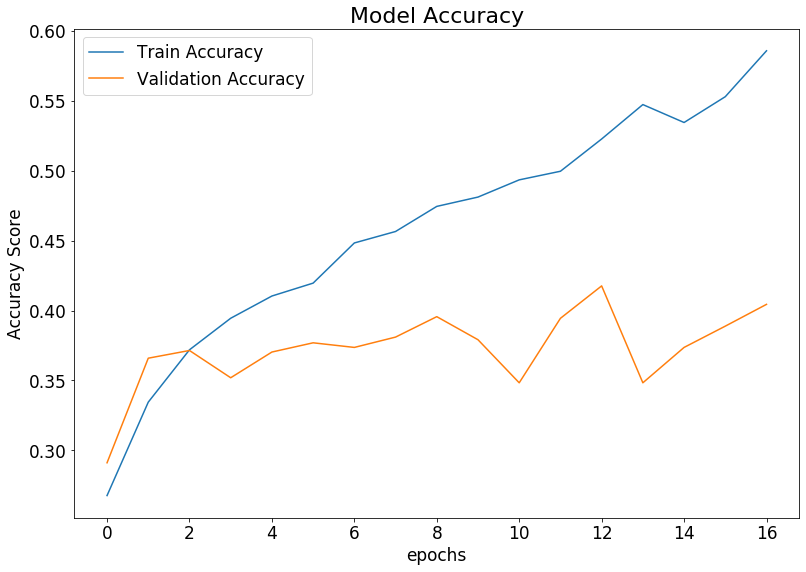

In [10]:
fig, ax = plt.subplots(figsize=(13,9))
ax.set_title('Model Accuracy', fontsize = 22)
ax.plot(history_4.epoch, history_4.history["acc"], label="Train Accuracy")
ax.plot(history_4.epoch, history_4.history["val_acc"], label="Validation Accuracy")
plt.xlabel('epochs', fontsize = 17)
plt.ylabel('Accuracy Score', fontsize = 17)
ax.tick_params(axis = 'both', labelsize = 17)
ax.legend(fontsize = 17)

I'm overfitting, is the model is too complex?

In [34]:
model_4 = models.Sequential()
model_4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))#imput layer
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))
#model_3.add(layers.Conv2D(256, (3, 3), activation='relu'))
#model_3.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Flatten())
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(128, activation='relu'))
#model_3.add(layers.Dense(256, activation='relu'))
model_4.add(layers.Dense(5, activation='softmax'))

model_4.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])


I cut some layers in an attempt to fight overfitting

In [35]:
history_5 = model_4.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10, 
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 69s 694ms/step - loss: 1.5895 - acc: 0.2670 - val_loss: 1.5444 - val_acc: 0.3637
Epoch 2/10
100/100 [==============================] - 75s 751ms/step - loss: 1.4508 - acc: 0.3890 - val_loss: 1.3995 - val_acc: 0.4846
Epoch 3/10
100/100 [==============================] - 69s 694ms/step - loss: 1.2930 - acc: 0.4825 - val_loss: 1.4899 - val_acc: 0.3721
Epoch 4/10
100/100 [==============================] - 56s 560ms/step - loss: 1.1475 - acc: 0.5540 - val_loss: 1.3800 - val_acc: 0.4275
Epoch 5/10
100/100 [==============================] - 47s 466ms/step - loss: 0.9740 - acc: 0.6535 - val_loss: 1.4785 - val_acc: 0.4011
Epoch 6/10
100/100 [==============================] - 47s 471ms/step - loss: 0.8187 - acc: 0.7310 - val_loss: 1.5285 - val_acc: 0.3923
Epoch 7/10
100/100 [==============================] - 56s 565ms/step - loss: 0.6316 - acc: 0.7960 - val_loss: 2.0100 - val_acc: 0.3799
Epoch 8/10
100/100 [==============================] - 5

Still overfitting, I'll dumb it down even more

In [36]:
model_5 = models.Sequential()
model_5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))#imput layer
model_5.add(layers.MaxPooling2D((2, 2)))
model_5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_5.add(layers.MaxPooling2D((2, 2)))
#model_4.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model_4.add(layers.MaxPooling2D((2, 2)))
#model_3.add(layers.Conv2D(256, (3, 3), activation='relu'))
#model_3.add(layers.MaxPooling2D((2, 2)))
model_5.add(layers.Flatten())
model_5.add(layers.Dense(64, activation='relu'))
#model_4.add(layers.Dense(128, activation='relu'))
#model_3.add(layers.Dense(256, activation='relu'))
model_5.add(layers.Dense(5, activation='softmax'))

model_5.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [37]:
history_6 = model_5.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10, 
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 40s 395ms/step - loss: 1.6081 - acc: 0.2605 - val_loss: 1.6790 - val_acc: 0.1791
Epoch 2/10
100/100 [==============================] - 47s 470ms/step - loss: 1.4357 - acc: 0.4250 - val_loss: 1.4522 - val_acc: 0.4220
Epoch 3/10
100/100 [==============================] - 38s 378ms/step - loss: 1.2467 - acc: 0.5326 - val_loss: 1.3751 - val_acc: 0.4253
Epoch 4/10
100/100 [==============================] - 41s 406ms/step - loss: 1.0825 - acc: 0.6225 - val_loss: 1.4232 - val_acc: 0.3866
Epoch 5/10
100/100 [==============================] - 49s 490ms/step - loss: 0.9227 - acc: 0.6845 - val_loss: 1.3858 - val_acc: 0.4088
Epoch 6/10
100/100 [==============================] - 38s 375ms/step - loss: 0.7724 - acc: 0.7675 - val_loss: 1.5718 - val_acc: 0.3901
Epoch 7/10
100/100 [==============================] - 37s 375ms/step - loss: 0.6457 - acc: 0.8120 - val_loss: 1.6193 - val_acc: 0.3330
Epoch 8/10
100/100 [==============================] - 3

Problem still persists, I'm going to add some image flips to the train and validation data to see if it helps, and remove some complexity in the dense layers

In [42]:
model_6 = models.Sequential()
model_6.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))#imput layer
model_6.add(layers.MaxPooling2D((2, 2)))
model_6.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_6.add(layers.MaxPooling2D((2, 2)))
#model_4.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model_4.add(layers.MaxPooling2D((2, 2)))
#model_3.add(layers.Conv2D(256, (3, 3), activation='relu'))
#model_3.add(layers.MaxPooling2D((2, 2)))
model_6.add(layers.Flatten())
model_6.add(layers.Dense(32, activation='relu'))
#model_4.add(layers.Dense(128, activation='relu'))
#model_3.add(layers.Dense(256, activation='relu'))
model_6.add(layers.Dense(5, activation='softmax'))

model_6.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [43]:
history_7 = model_6.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10, 
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 42s 421ms/step - loss: 1.5937 - acc: 0.2655 - val_loss: 1.5568 - val_acc: 0.3396
Epoch 2/10
100/100 [==============================] - 40s 400ms/step - loss: 1.5162 - acc: 0.3360 - val_loss: 1.5545 - val_acc: 0.3308
Epoch 3/10
100/100 [==============================] - 41s 414ms/step - loss: 1.4701 - acc: 0.3725 - val_loss: 1.4976 - val_acc: 0.4033
Epoch 4/10
100/100 [==============================] - 41s 410ms/step - loss: 1.4395 - acc: 0.3865 - val_loss: 1.4972 - val_acc: 0.3698
Epoch 5/10
100/100 [==============================] - 59s 590ms/step - loss: 1.4204 - acc: 0.3980 - val_loss: 1.5011 - val_acc: 0.3890
Epoch 6/10
100/100 [==============================] - 72s 720ms/step - loss: 1.3845 - acc: 0.4185 - val_loss: 1.5664 - val_acc: 0.3978
Epoch 7/10
100/100 [==============================] - 43s 434ms/step - loss: 1.3886 - acc: 0.4120 - val_loss: 1.4869 - val_acc: 0.3912
Epoch 8/10
100/100 [==============================] - 4

In [45]:
#added flips now to the data gen, let's see if it helps
model_7 = models.Sequential()
model_7.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))#imput layer
model_7.add(layers.MaxPooling2D((2, 2)))
model_7.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_7.add(layers.MaxPooling2D((2, 2)))
model_7.add(layers.Conv2D(128, (3, 3), activation='relu'))#brough another Convolution layer back
model_7.add(layers.MaxPooling2D((2, 2)))
#model_3.add(layers.Conv2D(256, (3, 3), activation='relu'))
#model_3.add(layers.MaxPooling2D((2, 2)))
model_7.add(layers.Flatten())
model_7.add(layers.Dense(64, activation='relu'))#changed to back to 64 to add complexity
#model_4.add(layers.Dense(128, activation='relu'))
#model_3.add(layers.Dense(256, activation='relu'))
model_7.add(layers.Dense(5, activation='softmax'))

model_7.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [46]:
history_8 = model_7.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=12, 
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/12
100/100 [==============================] - 71s 711ms/step - loss: 1.5441 - acc: 0.2970 - val_loss: 1.4327 - val_acc: 0.4220
Epoch 2/12
100/100 [==============================] - 49s 487ms/step - loss: 1.4300 - acc: 0.3855 - val_loss: 1.4183 - val_acc: 0.4145
Epoch 3/12
100/100 [==============================] - 48s 483ms/step - loss: 1.3599 - acc: 0.4245 - val_loss: 1.3667 - val_acc: 0.4143
Epoch 4/12
100/100 [==============================] - 56s 564ms/step - loss: 1.3216 - acc: 0.4470 - val_loss: 1.4310 - val_acc: 0.3725
Epoch 5/12
100/100 [==============================] - 48s 477ms/step - loss: 1.2648 - acc: 0.4935 - val_loss: 1.3885 - val_acc: 0.4132
Epoch 6/12
100/100 [==============================] - 47s 471ms/step - loss: 1.2265 - acc: 0.5161 - val_loss: 1.3714 - val_acc: 0.4179
Epoch 7/12
100/100 [==============================] - 55s 547ms/step - loss: 1.1906 - acc: 0.5335 - val_loss: 1.3785 - val_acc: 0.4066
Epoch 8/12
100/100 [==============================] - 4

It did not help

I'm curious if going from rgb to grayscale could help, also I'll bring back a dense layer

In [53]:
model_8 = models.Sequential()
model_8.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)))
model_8.add(layers.MaxPooling2D((2, 2)))
model_8.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_8.add(layers.MaxPooling2D((2, 2)))
model_8.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_8.add(layers.MaxPooling2D((2, 2)))
#model_3.add(layers.Conv2D(256, (3, 3), activation='relu'))
#model_3.add(layers.MaxPooling2D((2, 2)))
model_8.add(layers.Flatten())
model_8.add(layers.Dense(64, activation='relu'))
model_8.add(layers.Dense(128, activation='relu'))
#model_3.add(layers.Dense(256, activation='relu'))
model_8.add(layers.Dense(5, activation='softmax'))

model_8.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [54]:
history_9 = model_8.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10, 
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 50s 498ms/step - loss: 1.5996 - acc: 0.2440 - val_loss: 1.5954 - val_acc: 0.2165
Epoch 2/10
100/100 [==============================] - 48s 476ms/step - loss: 1.5413 - acc: 0.3190 - val_loss: 1.5303 - val_acc: 0.3648
Epoch 3/10
100/100 [==============================] - 56s 563ms/step - loss: 1.4851 - acc: 0.3595 - val_loss: 1.5316 - val_acc: 0.3564
Epoch 4/10
100/100 [==============================] - 47s 471ms/step - loss: 1.4615 - acc: 0.3660 - val_loss: 1.5455 - val_acc: 0.3714
Epoch 5/10
100/100 [==============================] - 46s 461ms/step - loss: 1.4479 - acc: 0.3795 - val_loss: 1.5470 - val_acc: 0.2934
Epoch 6/10
100/100 [==============================] - 57s 571ms/step - loss: 1.4358 - acc: 0.3880 - val_loss: 1.5278 - val_acc: 0.3615
Epoch 7/10
100/100 [==============================] - 47s 468ms/step - loss: 1.4121 - acc: 0.3995 - val_loss: 1.5121 - val_acc: 0.3084
Epoch 8/10
100/100 [==============================] - 5

The model's underfitting again, time to up the complexity, I'll bring back more layers. 

In [57]:
model_9 = models.Sequential()
model_9.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)))
model_9.add(layers.MaxPooling2D((2, 2)))
model_9.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_9.add(layers.MaxPooling2D((2, 2)))
model_9.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_9.add(layers.MaxPooling2D((2, 2)))
model_9.add(layers.Conv2D(256, (3, 3), activation='relu'))#brough another Convolution layer back
model_9.add(layers.MaxPooling2D((2, 2)))
model_9.add(layers.Flatten())
model_9.add(layers.Dense(64, activation='relu'))
model_9.add(layers.Dense(128, activation='relu'))
model_9.add(layers.Dense(256, activation='relu'))#brough another dense layer layer back
model_9.add(layers.Dense(5, activation='softmax'))

model_9.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [58]:
history_10 = model_9.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10, 
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 62s 623ms/step - loss: 1.6040 - acc: 0.2265 - val_loss: 1.6019 - val_acc: 0.2045
Epoch 2/10
100/100 [==============================] - 54s 536ms/step - loss: 1.5750 - acc: 0.2870 - val_loss: 1.5407 - val_acc: 0.3582
Epoch 3/10
100/100 [==============================] - 79s 792ms/step - loss: 1.5127 - acc: 0.3525 - val_loss: 1.5356 - val_acc: 0.3495
Epoch 4/10
100/100 [==============================] - 92s 918ms/step - loss: 1.4828 - acc: 0.3440 - val_loss: 1.5104 - val_acc: 0.3560
Epoch 5/10
100/100 [==============================] - 65s 651ms/step - loss: 1.4727 - acc: 0.3590 - val_loss: 1.5345 - val_acc: 0.3017
Epoch 6/10
100/100 [==============================] - 75s 747ms/step - loss: 1.4568 - acc: 0.3635 - val_loss: 1.5388 - val_acc: 0.3374
Epoch 7/10
100/100 [==============================] - 55s 554ms/step - loss: 1.4484 - acc: 0.3865 - val_loss: 1.6060 - val_acc: 0.3549
Epoch 8/10
100/100 [==============================] - 6

In [59]:
model_a = models.Sequential()
model_a.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)))
model_a.add(layers.MaxPooling2D((2, 2)))
model_a.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_a.add(layers.MaxPooling2D((2, 2)))
model_a.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_a.add(layers.MaxPooling2D((2, 2)))
model_a.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_a.add(layers.MaxPooling2D((2, 2)))
model_a.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_a.add(layers.MaxPooling2D((2, 2)))
model_a.add(layers.Flatten())
model_a.add(layers.Dense(64, activation='relu'))
model_a.add(layers.Dense(64, activation='relu'))
model_a.add(layers.Dense(128, activation='relu'))
model_a.add(layers.Dense(256, activation='relu'))
model_a.add(layers.Dense(5, activation='softmax'))

model_a.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [60]:
history_a = model_a.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=17, 
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/17
100/100 [==============================] - 84s 840ms/step - loss: 1.6017 - acc: 0.2249 - val_loss: 1.6061 - val_acc: 0.1923
Epoch 2/17
100/100 [==============================] - 94s 942ms/step - loss: 1.5687 - acc: 0.2980 - val_loss: 1.5636 - val_acc: 0.2749
Epoch 3/17
100/100 [==============================] - 109s 1s/step - loss: 1.5206 - acc: 0.3305 - val_loss: 1.5276 - val_acc: 0.3286
Epoch 4/17
100/100 [==============================] - 68s 684ms/step - loss: 1.4965 - acc: 0.3465 - val_loss: 1.5554 - val_acc: 0.3275
Epoch 5/17
100/100 [==============================] - 65s 653ms/step - loss: 1.4844 - acc: 0.3565 - val_loss: 1.5631 - val_acc: 0.3363
Epoch 6/17
100/100 [==============================] - 62s 621ms/step - loss: 1.4666 - acc: 0.3625 - val_loss: 1.5143 - val_acc: 0.3855
Epoch 7/17
100/100 [==============================] - 79s 789ms/step - loss: 1.4720 - acc: 0.3625 - val_loss: 1.5167 - val_acc: 0.3890
Epoch 8/17
100/100 [==============================] - 84s

I'm going back to rgb and I'm gonna start googling image classification regularization

[refrenced material](https://medium.com/intelligentmachines/convolutional-neural-network-and-regularization-techniques-with-tensorflow-and-keras-5a09e6e65dc7) Added keras regularizer (l1) and lambda = 0.01

Note: I forgot to change the colors back to rgb

In [67]:
model_b = models.Sequential() 
model_b.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)))
model_b.add(layers.MaxPooling2D((2, 2)))
model_b.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_b.add(layers.MaxPooling2D((2, 2)))
model_b.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_b.add(layers.MaxPooling2D((2, 2)))
model_b.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01) ))
model_b.add(layers.MaxPooling2D((2, 2)))
model_b.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01) ))
model_b.add(layers.MaxPooling2D((2, 2)))
model_b.add(layers.Flatten())
model_b.add(layers.Dense(64, activation='relu'))
model_b.add(layers.Dense(64, activation='relu'))
model_b.add(layers.Dense(128, activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01) ))
model_b.add(layers.Dense(256, activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01) ))
model_b.add(layers.Dense(5, activation='softmax'))

model_b.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [68]:
history_b = model_b.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10, 
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 79s 792ms/step - loss: 102.6863 - acc: 0.2210 - val_loss: 81.9619 - val_acc: 0.2078
Epoch 2/10
100/100 [==============================] - 71s 708ms/step - loss: 65.3223 - acc: 0.2420 - val_loss: 50.0674 - val_acc: 0.2374
Epoch 3/10
100/100 [==============================] - 70s 704ms/step - loss: 38.4878 - acc: 0.2475 - val_loss: 28.3951 - val_acc: 0.2374
Epoch 4/10
100/100 [==============================] - 73s 727ms/step - loss: 21.8769 - acc: 0.2330 - val_loss: 16.9571 - val_acc: 0.2308
Epoch 5/10
100/100 [==============================] - 71s 705ms/step - loss: 14.6059 - acc: 0.2310 - val_loss: 12.7692 - val_acc: 0.2358
Epoch 6/10
100/100 [==============================] - 68s 682ms/step - loss: 11.5689 - acc: 0.2305 - val_loss: 10.3962 - val_acc: 0.2363
Epoch 7/10
100/100 [==============================] - 70s 704ms/step - loss: 9.3481 - acc: 0.2291 - val_loss: 8.3284 - val_acc: 0.2352
Epoch 8/10
100/100 [======================

Now I'm back to using rgb and I upped the image size to 150x150

In [73]:
model_c = models.Sequential()
model_c.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))# 3 for rgb *it rhymes*
model_c.add(layers.MaxPooling2D((2, 2)))
model_c.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_c.add(layers.MaxPooling2D((2, 2)))
model_c.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_c.add(layers.MaxPooling2D((2, 2)))
model_c.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01) ))
model_c.add(layers.MaxPooling2D((2, 2)))
model_c.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01) ))
model_c.add(layers.MaxPooling2D((2, 2)))
model_c.add(layers.Flatten())
model_c.add(layers.Dense(64, activation='relu'))
model_c.add(layers.Dense(64, activation='relu'))
model_c.add(layers.Dense(128, activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01) ))
model_c.add(layers.Dense(256, activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01) ))
model_c.add(layers.Dense(5, activation='softmax'))

model_c.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [74]:
history_c = model_c.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10, 
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 103s 1s/step - loss: 102.5293 - acc: 0.2395 - val_loss: 81.7898 - val_acc: 0.2033
Epoch 2/10
100/100 [==============================] - 97s 972ms/step - loss: 65.1290 - acc: 0.2720 - val_loss: 49.8766 - val_acc: 0.2626
Epoch 3/10
100/100 [==============================] - 94s 940ms/step - loss: 38.3159 - acc: 0.2900 - val_loss: 28.2487 - val_acc: 0.3475
Epoch 4/10
100/100 [==============================] - 97s 971ms/step - loss: 21.7722 - acc: 0.2355 - val_loss: 16.8839 - val_acc: 0.2341
Epoch 5/10
100/100 [==============================] - 97s 969ms/step - loss: 14.5432 - acc: 0.2265 - val_loss: 12.7133 - val_acc: 0.2286
Epoch 6/10
100/100 [==============================] - 97s 972ms/step - loss: 11.5123 - acc: 0.2330 - val_loss: 10.3403 - val_acc: 0.2418
Epoch 7/10
100/100 [==============================] - 96s 960ms/step - loss: 9.2906 - acc: 0.2360 - val_loss: 8.2720 - val_acc: 0.2335
Epoch 8/10
100/100 [========================

That might have been too much regularization, I'm gonna shed some off

In [75]:
model_d = models.Sequential() 
model_d.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model_d.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_d.add(layers.MaxPooling2D((2, 2)))
model_d.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_d.add(layers.MaxPooling2D((2, 2)))
model_d.add(layers.Conv2D(128, (3, 3)))
model_d.add(layers.MaxPooling2D((2, 2)))
model_d.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01) ))
model_d.add(layers.MaxPooling2D((2, 2)))
model_d.add(layers.Flatten())
model_d.add(layers.Dense(64, activation='relu'))
model_d.add(layers.Dense(64, activation='relu'))
model_d.add(layers.Dense(128, activation='relu',))
model_d.add(layers.Dense(256, activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01) ))
model_d.add(layers.Dense(5, activation='softmax'))

model_d.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

history_d = model_d.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10, 
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 291s 3s/step - loss: 66.2069 - acc: 0.2165 - val_loss: 52.2802 - val_acc: 0.2407
Epoch 2/10
100/100 [==============================] - 276s 3s/step - loss: 41.2493 - acc: 0.2445 - val_loss: 31.2310 - val_acc: 0.2319
Epoch 3/10
100/100 [==============================] - 290s 3s/step - loss: 23.8562 - acc: 0.2845 - val_loss: 17.5756 - val_acc: 0.3564
Epoch 4/10
100/100 [==============================] - 275s 3s/step - loss: 13.9171 - acc: 0.2935 - val_loss: 11.3544 - val_acc: 0.2297
Epoch 5/10
100/100 [==============================] - 280s 3s/step - loss: 10.2440 - acc: 0.3000 - val_loss: 9.1719 - val_acc: 0.3626
Epoch 6/10
100/100 [==============================] - 276s 3s/step - loss: 8.3689 - acc: 0.3489 - val_loss: 7.4972 - val_acc: 0.3824
Epoch 7/10
100/100 [==============================] - 282s 3s/step - loss: 6.8918 - acc: 0.3490 - val_loss: 6.2361 - val_acc: 0.3385
Epoch 8/10
100/100 [==============================] - 277s 3

I'll run another 10 epochs to see if it improves

In [76]:
history_db = model_d.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 284s 3s/step - loss: 3.2908 - acc: 0.3650 - val_loss: 3.0228 - val_acc: 0.4033
Epoch 2/10
100/100 [==============================] - 281s 3s/step - loss: 2.8903 - acc: 0.3680 - val_loss: 2.7063 - val_acc: 0.3725
Epoch 3/10
100/100 [==============================] - 271s 3s/step - loss: 2.6522 - acc: 0.3625 - val_loss: 2.5642 - val_acc: 0.3441
Epoch 4/10
100/100 [==============================] - 280s 3s/step - loss: 2.5271 - acc: 0.3770 - val_loss: 2.4709 - val_acc: 0.3670
Epoch 5/10
100/100 [==============================] - 277s 3s/step - loss: 2.4396 - acc: 0.3670 - val_loss: 2.3365 - val_acc: 0.3934
Epoch 6/10
100/100 [==============================] - 277s 3s/step - loss: 2.3551 - acc: 0.3570 - val_loss: 2.2761 - val_acc: 0.3769
Epoch 7/10
100/100 [==============================] - 289s 3s/step - loss: 2.2809 - acc: 0.3815 - val_loss: 2.5420 - val_acc: 0.3039
Epoch 8/10
100/100 [==============================] - 289s 3s/step - 

At this point I am considering a few things, maybe my data does not quite have enough images, 70% of the data going to the training data isnt enough, maybe a 90 5 5 split could yield better performance.

One thing to consider was that I was using 5 breeds and not switching them up, I'm going back down to just 2-3 next 

I have decided to do one more model with less regulaization, if does not go well, I'll make a modeling2 notebook as this is getting long


In [77]:
model_e = models.Sequential()
model_e.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model_e.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_e.add(layers.MaxPooling2D((2, 2)))
model_e.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_e.add(layers.MaxPooling2D((2, 2)))
model_e.add(layers.Conv2D(128, (3, 3)))
model_e.add(layers.MaxPooling2D((2, 2)))
model_e.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01) ))
model_e.add(layers.MaxPooling2D((2, 2)))
model_e.add(layers.Flatten())
model_e.add(layers.Dense(64, activation='relu'))
model_e.add(layers.Dense(64, activation='relu'))
model_e.add(layers.Dense(128, activation='relu',))
#model_e.add(layers.Dense(256, activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01) ))
model_e.add(layers.Dense(5, activation='softmax'))

model_e.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

history_e = model_e.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=15, #more 
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/15
100/100 [==============================] - 297s 3s/step - loss: 47.4302 - acc: 0.2180 - val_loss: 35.0511 - val_acc: 0.3198
Epoch 2/15
100/100 [==============================] - 290s 3s/step - loss: 25.5289 - acc: 0.3070 - val_loss: 17.0633 - val_acc: 0.3879
Epoch 3/15
100/100 [==============================] - 278s 3s/step - loss: 11.2431 - acc: 0.3555 - val_loss: 6.4314 - val_acc: 0.3714
Epoch 4/15
100/100 [==============================] - 280s 3s/step - loss: 3.8254 - acc: 0.3550 - val_loss: 2.2840 - val_acc: 0.3453
Epoch 5/15
100/100 [==============================] - 284s 3s/step - loss: 1.8906 - acc: 0.3575 - val_loss: 1.7234 - val_acc: 0.3923
Epoch 6/15
100/100 [==============================] - 279s 3s/step - loss: 1.7387 - acc: 0.3540 - val_loss: 1.7680 - val_acc: 0.3560
Epoch 7/15
100/100 [==============================] - 286s 3s/step - loss: 1.6906 - acc: 0.3655 - val_loss: 1.7150 - val_acc: 0.3231
Epoch 8/15
100/100 [==============================] - 276s 3s/st

In [80]:
#from https://medium.com/intelligentmachines/convolutional-neural-network-and-regularization-techniques-with-tensorflow-and-keras-5a09e6e65dc7
#had to tweak some things to get it to work
def vis_history(history): 
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

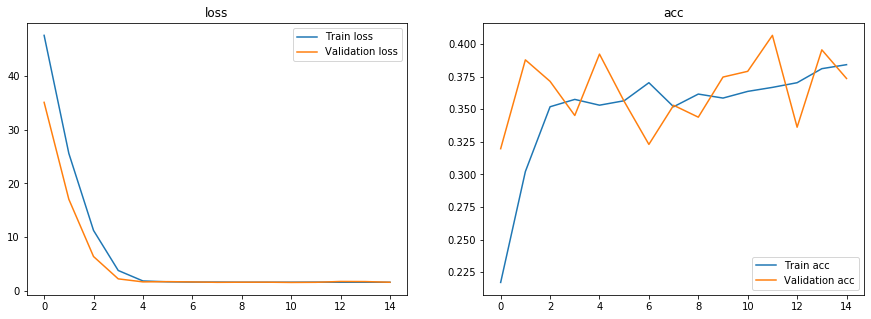

In [81]:
vis_history(history_e)

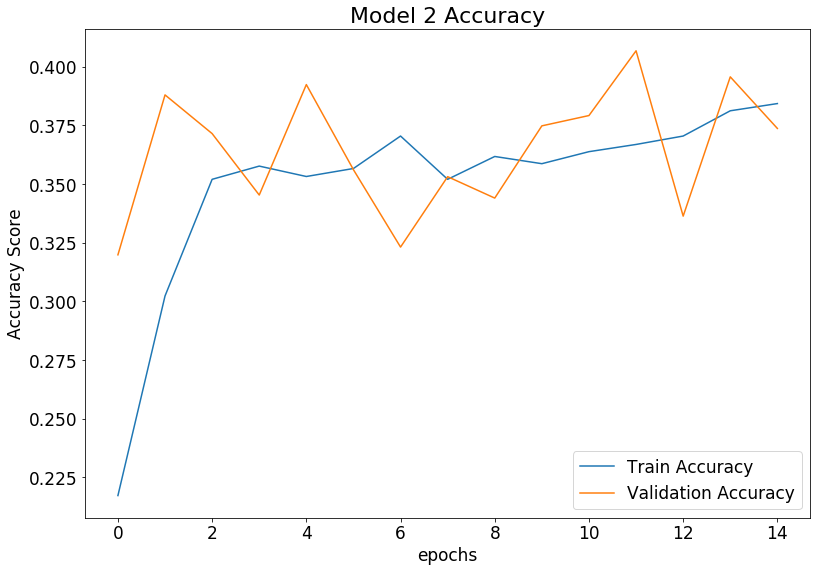

In [90]:
#slightly better vis for presentation
fig, ax = plt.subplots(figsize=(13,9))
ax.set_title('Model 2 Accuracy', fontsize = 22)
ax.plot(history_e.epoch, history_e.history["acc"], label="Train Accuracy")
ax.plot(history_e.epoch, history_e.history["val_acc"], label="Validation Accuracy")
plt.xlabel('epochs', fontsize = 17)
plt.ylabel('Accuracy Score', fontsize = 17)
ax.tick_params(axis = 'both', labelsize = 17)
ax.legend(fontsize = 17)

In [ ]:
#Now I'm going to go back to using 2 dogs, see you in the next notebook